In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
W = np.array([ [-9, -12, 4], [-9, 4, -12], [-1, -10, -10] ]).T
b = np.array([6, 6, 4])
c = np.array([4, 6, 6])

samples = []
C_val = 1
V = np.array([C_val, C_val, C_val]) # initial
H = np.array([0,0,0])

In [3]:
num_samples = 50000

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sample_with_prob(arr):
    return np.array([np.random.choice([0,1], p=[1-prob,prob]) for prob in arr])

In [4]:
for t in range(num_samples):
    if (t%2==0): # V to H
        # P(H | V) = sigm(WV + c)
        p_vec = np.array(sigmoid(np.matmul(W,V)+c))
        
        H = sample_with_prob(p_vec)
        #print("H", H)

    else: # H to V
        p_vec = np.array(sigmoid(np.matmul(H,W)+b))
        V = sample_with_prob(p_vec)
        V[2] = C_val
        #print("V",V)
        istr = [str(i) for i in V]
        samples.append("".join(istr))


000 count:  0 , 0.0 %
010 count:  0 , 0.0 %
100 count:  0 , 0.0 %
110 count:  0 , 0.0 %
001 count:  0 , 0.0 %
011 count:  113 , 0.452 %
101 count:  109 , 0.436 %
111 count:  24778 , 99.112 %


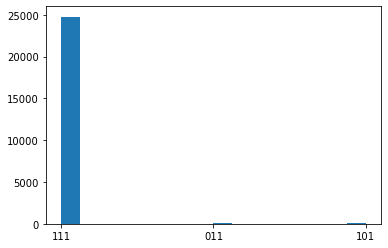

In [5]:
print("000 count: ",samples.count("000"), ",",100*samples.count("000")/(num_samples/2), "%")
print("010 count: ",samples.count("010"), ",",100*samples.count("010")/(num_samples/2), "%")
print("100 count: ",samples.count("100"), ",",100*samples.count("100")/(num_samples/2), "%")
print("110 count: ",samples.count("110"), ",",100*samples.count("110")/(num_samples/2), "%")

print("001 count: ",samples.count("001"), ",",100*samples.count("001")/(num_samples/2), "%")
print("011 count: ",samples.count("011"), ",",100*samples.count("011")/(num_samples/2), "%")
print("101 count: ",samples.count("101"), ",",100*samples.count("101")/(num_samples/2), "%")
print("111 count: ",samples.count("111"), ",",100*samples.count("111")/(num_samples/2), "%")

#plt.bar(samples)
plt.hist(samples, bins='auto')
plt.show()

In [6]:
# Energy Function
def energy_function(W,h,v,b,c):
    return -np.matmul(np.matmul(h.T,W),v) - b.T@v - np.matmul(c.T,h)

def Z_value(W,b,c,C_val):
    exp_sum = 0
    V_lists = [np.array(v)for v in [[0,0,C_val], [0,1,C_val], [1,0,C_val], [1,1,C_val]]]
    H_lists = [np.array(h) for h in [[0,0,0], [0,1,0], [1,0,0], [1,1,0], [0,0,1], [0,1,1], [1,0,1], [1,1,1]]]
    for h in H_lists:
        for v in V_lists:
            exp_sum += np.exp(-energy_function(W,h,v,b,c))
    return exp_sum

# (p(V))
def prob_visible(W,b,c,V,C_val):
    prod_bv = 1
    prod_wvc = 1
    for j in range(len(b)):
        prod_bv = prod_bv * np.exp(b[j] * V[j])
    for i in range(len(c)):
        prod_wvc = prod_wvc * (1 + np.exp(c[i]+np.matmul(W[i],V)))
    return prod_bv * prod_wvc / Z_value(W,b,c,C_val)

print("V = ", V)
print("p(V) = ", prob_visible(W,b,c,V,C_val))

V =  [1 1 1]
p(V) =  0.9900266663905319


In [7]:
# graph the energy functions